# Tugas Analisis Multimedia: **Image (Citra Digital)**

**Mata Kuliah:** Sistem & Teknologi Multimedia  
**Nama:** Eric Arwido Damanik
**NIM:** 122140157

---

## Deskripsi Tugas

Tugas ini bertujuan untuk memahami **representasi dasar data citra digital (image)** melalui praktik langsung memuat data, visualisasi komponen warna, serta melakukan analisis spasial sederhana menggunakan berbagai teknik dasar pengolahan citra.

Anda akan bekerja dengan satu atau beberapa gambar (foto diri, objek, atau lingkungan sekitar) untuk:

* Mengamati struktur data piksel dan channel warna (RGB, Grayscale, HSV, dsb.)
* Menganalisis perbedaan hasil visualisasi antar representasi warna
* Melakukan eksplorasi sederhana terhadap transformasi citra (cropping, filtering, edge detection, dll.)
* Menyimpulkan pengaruh setiap tahap pemrosesan terhadap persepsi visual

Fokus tugas ini adalah pada **pemahaman konsep representasi spasial citra digital** dan **interpretasi hasil visualisasi**, **bukan** pada manipulasi kompleks atau penerapan model pembelajaran mesin.

### **Soal 1 — Cropping dan Konversi Warna**

* Ambil sebuah gambar diri Anda (*selfie*) menggunakan kamera atau smartphone.
* Lakukan **cropping secara manual** untuk menghasilkan dua potongan:

  * Cropping **kotak persegi pada area wajah**.
  * Cropping **persegi panjang pada area latar belakang**.
* Resize hasil crop menjadi **920×920 piksel**.
* Konversi gambar menjadi **grayscale** dan **HSV**, lalu tampilkan ketiganya berdampingan.
* Tambahkan **anotasi teks** berisi nama Anda di atas kepala pada gambar hasil crop.

  * Gaya teks (font, warna, posisi, ukuran, ketebalan) **dibebaskan**.
* Jelaskan efek **cropping** dan **perubahan warna** menggunakan **Markdown**.


In [2]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import mediapipe as mp
import sys
import math
from math import hypot


In [ ]:

# Tentukan path gambar
image_path = 'assets_ws4\selfie.jpg'

# Cek apakah file ada
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Gambar tidak ditemukan di path: {image_path}")
# Load gambar menggunakan OpenCV
image = cv2.imread(image_path)

# Konversi dari BGR ke RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [26]:
# Koordinat kotak wajah dan latar belakang
face_box = (1200, 1800, 2100, 2700)
bg_box = (200, 200, 1400, 1000)

# Target Crop Size
target_size = (920, 920)

# Output
output_face_path = 'result_ws4/hasil_wajah.jpg'
output_bg_path = 'result_ws4/hasil_background.jpg'

h, w = image.shape[:2]
print(f"Gambar dimuat: {image_path}, ukuran asli (lebar, tinggi): ({w}, {h})")

print(f"Melakukan crop wajah di: {face_box}")
y1, y2 = face_box[1], face_box[3]
x1, x2 = face_box[0], face_box[2]
face_crop = image[y1:y2, x1:x2]

print(f"Melakukan crop background di: {bg_box}")
y1_bg, y2_bg = bg_box[1], bg_box[3]
x1_bg, x2_bg = bg_box[0], bg_box[2]
bg_crop = image[y1_bg:y2_bg, x1_bg:x2_bg]

print(f"Melakukan resize kedua gambar ke {target_size}...")
face_resized = cv2.resize(face_crop, target_size, interpolation=cv2.INTER_LANCZOS4)
bg_resized = cv2.resize(bg_crop, target_size, interpolation=cv2.INTER_LANCZOS4)

os.makedirs('result_ws4', exist_ok=True)
cv2.imwrite(output_face_path, face_resized)
cv2.imwrite(output_bg_path, bg_resized)

print(f"Hasil wajah disimpan di: {output_face_path}")
print(f"Hasil background disimpan di: {output_bg_path}")

Gambar dimuat: assets_ws4\selfie.jpg, ukuran asli (lebar, tinggi): (3120, 4160)
Melakukan crop wajah di: (1200, 1800, 2100, 2700)
Melakukan crop background di: (200, 200, 1400, 1000)
Melakukan resize kedua gambar ke (920, 920)...
Hasil wajah disimpan di: result_ws4/hasil_wajah.jpg
Hasil background disimpan di: result_ws4/hasil_background.jpg


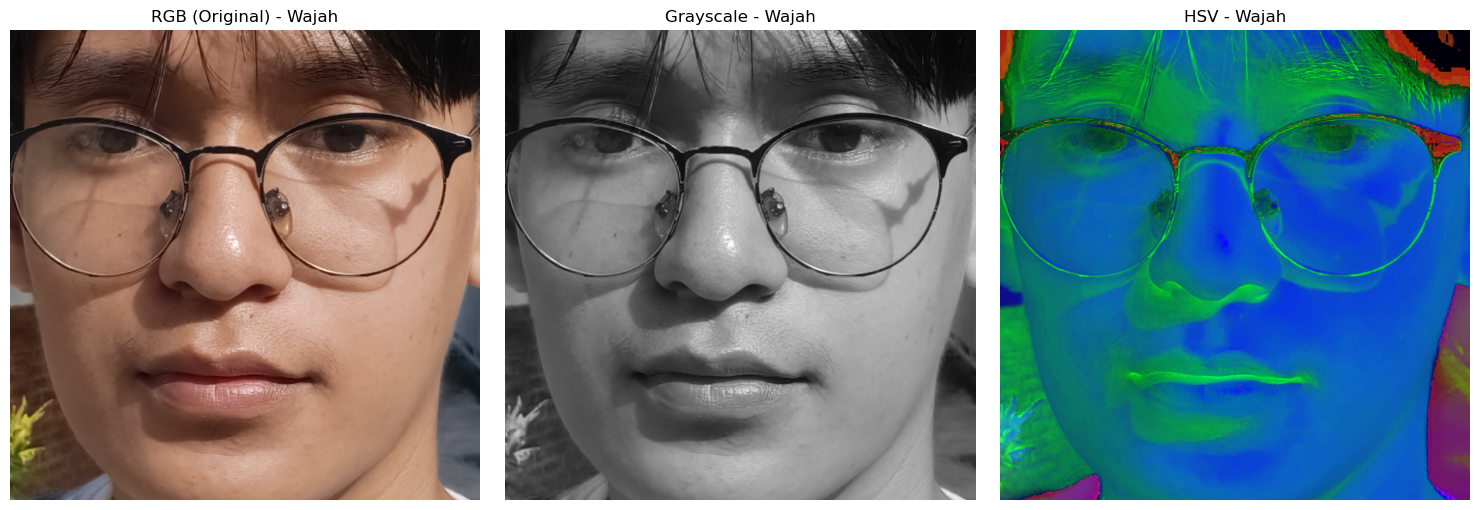

Visualisasi perbandingan RGB, Grayscale, dan HSV untuk wajah berhasil disimpan.


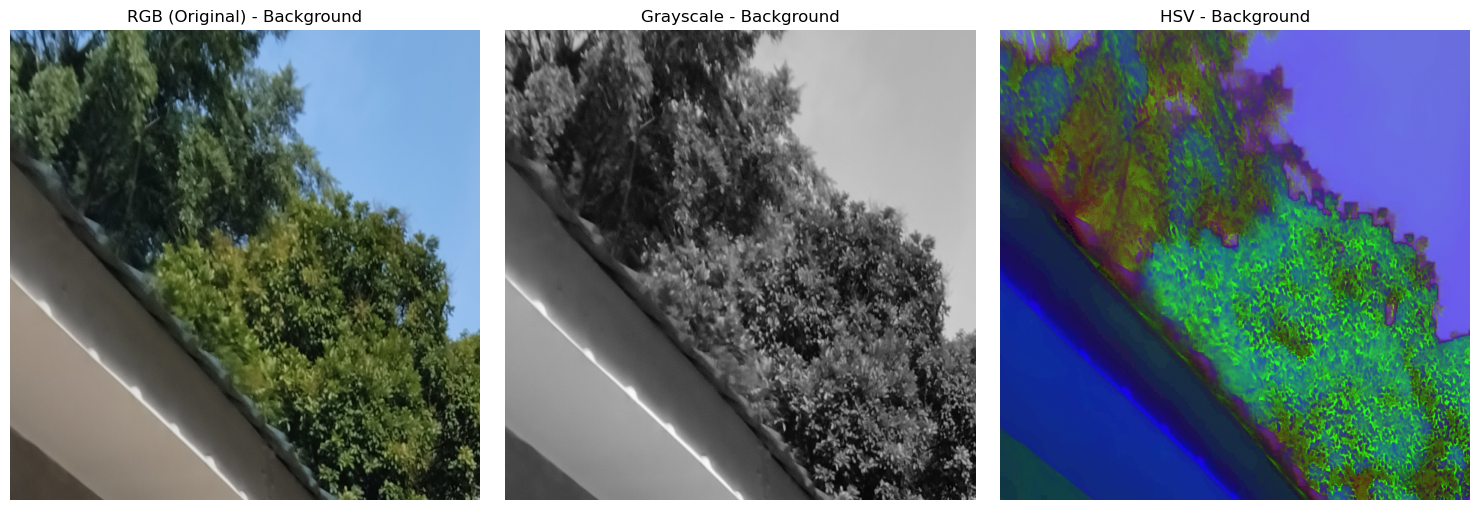

Visualisasi perbandingan RGB, Grayscale, dan HSV untuk background berhasil disimpan.


In [32]:
# Konversi face_resized ke RGB, Grayscale, dan HSV
face_rgb = cv2.cvtColor(face_resized, cv2.COLOR_BGR2RGB)
face_gray = cv2.cvtColor(face_resized, cv2.COLOR_BGR2GRAY)
face_hsv = cv2.cvtColor(face_resized, cv2.COLOR_BGR2HSV)

# Konversi bg_resized ke RGB, Grayscale, dan HSV
bg_rgb = cv2.cvtColor(bg_resized, cv2.COLOR_BGR2RGB)
bg_gray = cv2.cvtColor(bg_resized, cv2.COLOR_BGR2GRAY)
bg_hsv = cv2.cvtColor(bg_resized, cv2.COLOR_BGR2HSV)

# Tampilkan ketiga gambar berdampingan untuk wajah
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(face_rgb)
axes[0].set_title('RGB (Original) - Wajah')
axes[0].axis('off')

axes[1].imshow(face_gray, cmap='gray')
axes[1].set_title('Grayscale - Wajah')
axes[1].axis('off')

axes[2].imshow(face_hsv)
axes[2].set_title('HSV - Wajah')
axes[2].axis('off')

plt.tight_layout()
plt.savefig('result_ws4/perbandingan_warna_wajah.png', dpi=150, bbox_inches='tight')
plt.show()

print("Visualisasi perbandingan RGB, Grayscale, dan HSV untuk wajah berhasil disimpan.")

# Tampilkan ketiga gambar berdampingan untuk background
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(bg_rgb)
axes[0].set_title('RGB (Original) - Background')
axes[0].axis('off')

axes[1].imshow(bg_gray, cmap='gray')
axes[1].set_title('Grayscale - Background')
axes[1].axis('off')

axes[2].imshow(bg_hsv)
axes[2].set_title('HSV - Background')
axes[2].axis('off')

plt.tight_layout()
plt.savefig('result_ws4/perbandingan_warna_background.png', dpi=150, bbox_inches='tight')
plt.show()

print("Visualisasi perbandingan RGB, Grayscale, dan HSV untuk background berhasil disimpan.")

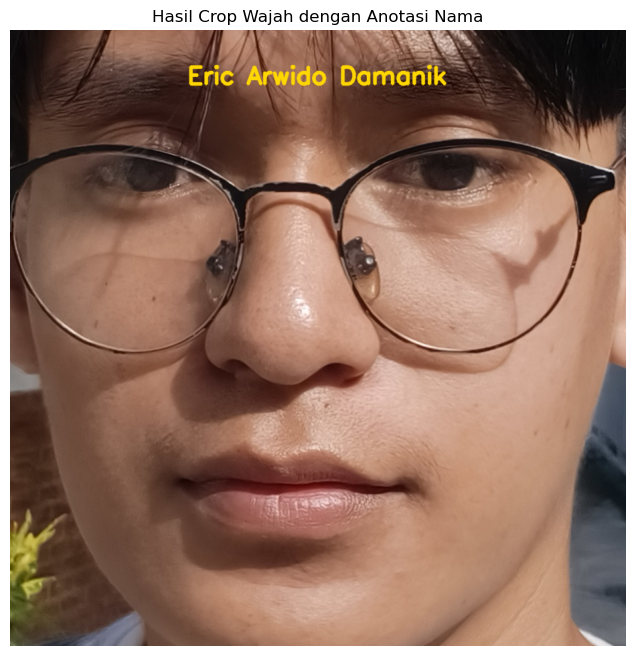

Gambar dengan anotasi berhasil disimpan di: result_ws4/hasil_wajah_anotasi.jpg


In [33]:
# Tambahkan anotasi teks pada gambar hasil crop wajah
face_with_text = face_rgb.copy()

# Teks yang akan ditambahkan
text = 'Eric Arwido Damanik'

# Konfigurasi teks
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1.2
font_thickness = 3
text_color = (255, 215, 0)  # Warna gold dalam RGB

# Dapatkan ukuran teks
(text_width, text_height), baseline = cv2.getTextSize(text, font, font_scale, font_thickness)

# Hitung posisi teks (di atas kepala, tengah horizontal)
x_position = (face_with_text.shape[1] - text_width) // 2
y_position = 80  # Posisi vertikal di atas kepala

# Tambahkan teks ke gambar
cv2.putText(face_with_text, text, (x_position, y_position), font, font_scale, text_color, font_thickness, cv2.LINE_AA)

# Konversi kembali ke BGR untuk disimpan
face_with_text_bgr = cv2.cvtColor(face_with_text, cv2.COLOR_RGB2BGR)

# Simpan hasil
output_annotated_path = 'result_ws4/hasil_wajah_anotasi.jpg'
cv2.imwrite(output_annotated_path, face_with_text_bgr)

# Tampilkan hasil
plt.figure(figsize=(8, 8))
plt.imshow(face_with_text)
plt.title('Hasil Crop Wajah dengan Anotasi Nama')
plt.axis('off')
plt.savefig('result_ws4/wajah_dengan_anotasi.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Gambar dengan anotasi berhasil disimpan di: {output_annotated_path}")

## Penjelasan Efek Cropping dan Perubahan Warna

1. **Cropping Wajah**  
   Area yang diambil: `(1200, 1800, 2100, 2700)` dan di-resize ke **920×920 piksel**.  
   - Membuat wajah menjadi fokus utama  
   - Mengurangi gangguan dari elemen lain  
   - Mempermudah analisis fitur wajah  

2. **Cropping Background**  
   Area yang diambil: `(200, 200, 1400, 1000)` lalu di-resize ke **920×920 piksel**.  
   - Memisahkan latar dari objek  
   - Membantu menganalisis pola atau tekstur background  


### Efek Perubahan Ruang Warna

#### 1. RGB (Red-Green-Blue)
Representasi warna asli seperti yang ditangkap kamera.  
Cocok untuk tampilan visual normal.

#### 2. Grayscale
Mengubah gambar menjadi skala abu-abu (1 channel).  
- Lebih sederhana  
- Kontras lebih jelas  
- Cocok untuk deteksi tepi dan analisis bentuk  

#### 3. HSV (Hue-Saturation-Value)
Memisahkan warna menjadi komponen Hue, Saturation, dan Value.  
- Lebih stabil terhadap perubahan cahaya  
- Sangat berguna untuk segmentasi berbasis warna  


### **Soal 2 — Manipulasi Channel Warna RGB**

* Gunakan gambar hasil crop dari Soal 1.
* Konversikan gambar ke ruang warna **RGB**.
* Lakukan manipulasi channel warna dengan cara:

  * **Naikkan intensitas channel merah sebanyak 50 poin** (maksimum 255).
  * **Turunkan intensitas channel biru sebanyak 30 poin** (minimum 0).
* Teknik atau cara menaikkan/menurunkan intensitas **dibebaskan**, asalkan logis dan hasilnya terlihat.
* Gabungkan kembali channel warna dan **simpan gambar hasil modifikasi dalam format `.png`**.
* **Tampilkan histogram per channel (R, G, B)** untuk gambar asli dan hasil modifikasi menggunakan `matplotlib.pyplot.hist`.
* Jelaskan dampak perubahan RGB pada warna gambar dalam sel **Markdown**.


Intensitas channel Merah dinaikkan 50 poin.
Intensitas channel Biru diturunkan 30 poin.


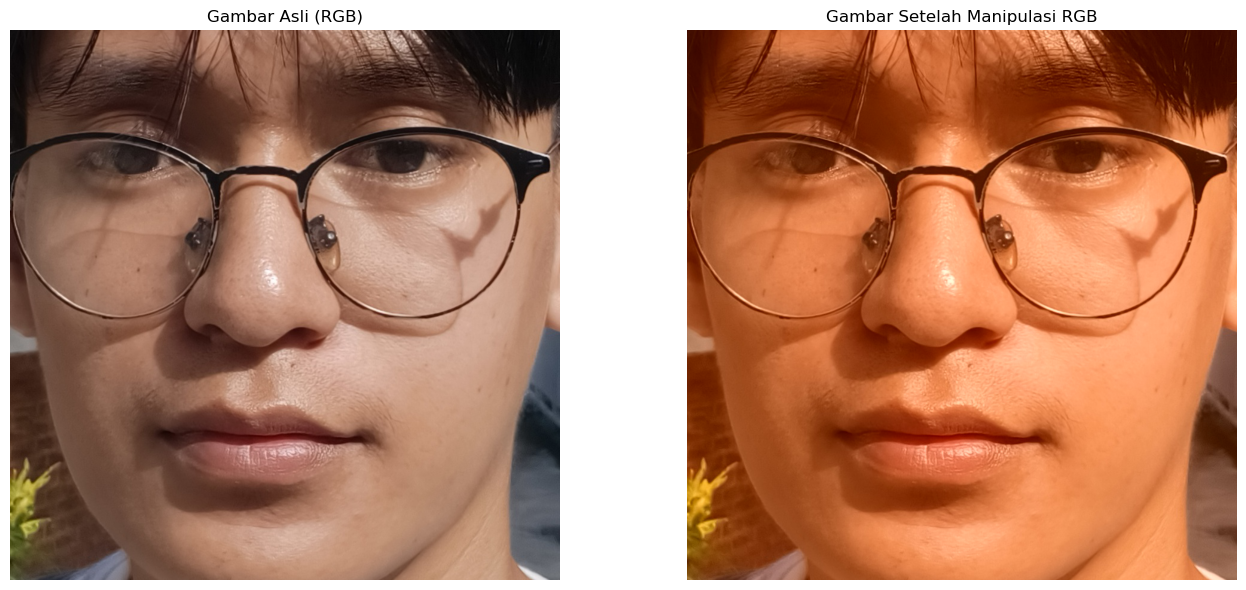

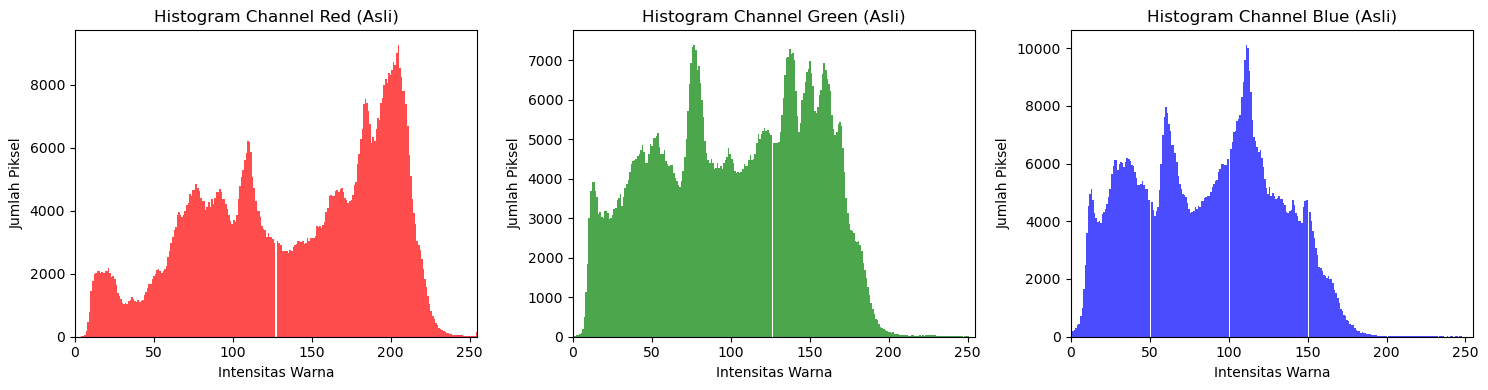

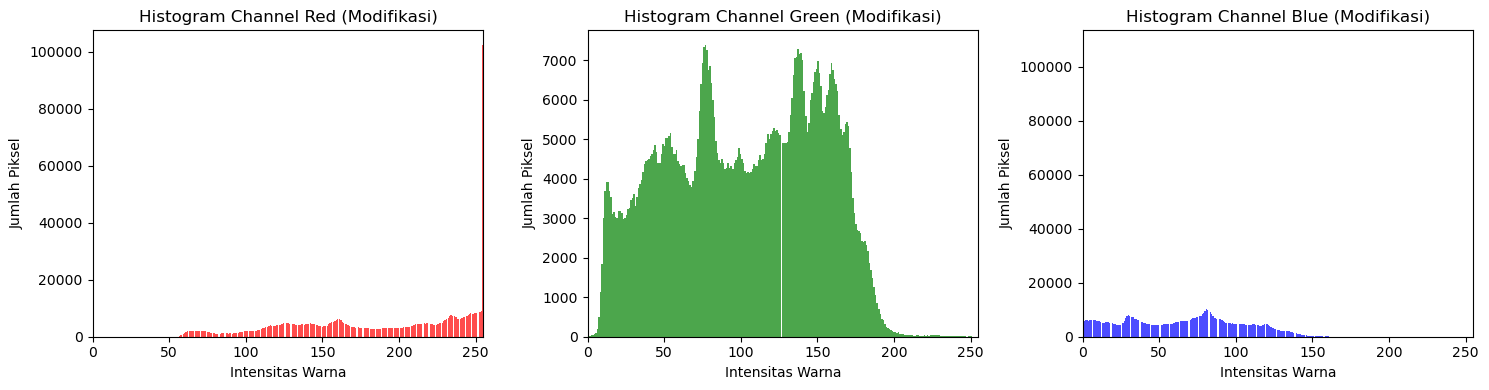

Gambar hasil manipulasi RGB disimpan di: result_ws4/hasil_manipulasi_rgb.jpg
Perbandingan gambar dan histogram berhasil disimpan.


In [ ]:
input_image_path = 'result_ws4/hasil_wajah.jpg'
output_image_path = 'result_ws4/hasil_manipulasi_rgb.jpg'

red_increase = 50
blue_decrease = 30

img_bgr = cv2.imread(input_image_path)

if img_bgr is None:
    raise FileNotFoundError(f"Gambar tidak ditemukan di path: {input_image_path}")

# Konversi gambar ke ruang warna RGB
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Pisahkan channel R, G, B
r_channel, g_channel, b_channel = cv2.split(img_rgb)

# Buat salinan channel untuk modifikasi
r_channel_mod = r_channel.astype(int) + red_increase
b_channel_mod = b_channel.astype(int) - blue_decrease

# Naikkan intensitas channel merah
r_channel_mod = np.clip(r_channel_mod, 0, 255).astype(np.uint8)

# Turunkan intensitas channel biru
b_channel_mod = np.clip(b_channel_mod, 0, 255).astype(np.uint8)

# Channel hijau tidak diubah
g_channel_mod = g_channel

print(f"Intensitas channel Merah dinaikkan {red_increase} poin.")
print(f"Intensitas channel Biru diturunkan {blue_decrease} poin.")

# Gabungkan kembali channel warna yang dimodifikasi
img_rgb_mod = cv2.merge((r_channel_mod, g_channel_mod, b_channel_mod))

# Simpan gambar hasil modifikasi
img_bgr_mod = cv2.cvtColor(img_rgb_mod, cv2.COLOR_RGB2BGR)
cv2.imwrite(output_image_path, img_bgr_mod)

# Tampilkan perbandingan gambar asli dan hasil modifikasi
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].imshow(img_rgb)
axes[0].set_title('Gambar Asli (RGB)')
axes[0].axis('off')

axes[1].imshow(img_rgb_mod)
axes[1].set_title('Gambar Setelah Manipulasi RGB')
axes[1].axis('off')

plt.tight_layout()
plt.savefig('result_ws4/perbandingan_asli_modifikasi.png', dpi=150, bbox_inches='tight')
plt.show()

# Tampilkan histogram per channel untuk gambar asli
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
colors = ('r', 'g', 'b')
channel_names = ('Red', 'Green', 'Blue')

for i, (color, name) in enumerate(zip(colors, channel_names)):
    axes[i].hist(img_rgb[:, :, i].flatten(), bins=256, color=color, alpha=0.7)
    axes[i].set_title(f'Histogram Channel {name} (Asli)')
    axes[i].set_xlabel('Intensitas Warna')
    axes[i].set_ylabel('Jumlah Piksel')
    axes[i].set_xlim([0, 255])

plt.tight_layout()
plt.savefig('result_ws4/histogram_rgb_asli.png', dpi=150, bbox_inches='tight')
plt.show()

# Tampilkan histogram per channel untuk gambar hasil modifikasi
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, (color, name) in enumerate(zip(colors, channel_names)):
    axes[i].hist(img_rgb_mod[:, :, i].flatten(), bins=256, color=color, alpha=0.7)
    axes[i].set_title(f'Histogram Channel {name} (Modifikasi)')
    axes[i].set_xlabel('Intensitas Warna')
    axes[i].set_ylabel('Jumlah Piksel')
    axes[i].set_xlim([0, 255])

plt.tight_layout()
plt.savefig('result_ws4/histogram_rgb_modifikasi.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Gambar hasil manipulasi RGB disimpan di: {output_image_path}")
print("Perbandingan gambar dan histogram berhasil disimpan.")

## Dampak Perubahan RGB pada Warna Gambar

### Pengaruh Manipulasi Channel Warna

**Channel Merah (+50 poin)**
- Gambar menjadi lebih **kemerahan**
- Warna kulit terlihat lebih cerah dan hangat
- Histogram channel merah bergeser ke kanan (intensitas meningkat)

**Channel Biru (-30 poin)**
- Warna **biru** terlihat berkurang**
- Histogram channel biru bergeser ke kiri (intensitas menurun)

**Efek Kombinasi**
- Gambar terlihat lebih **warm** dengan dominasi warna merah-oranye
- Kontras warna berubah, gambar terasa lebih "hangat" dan kurang dingin

### **Soal 3 — Deteksi Tepi dan Filter Citra**

* Ambil gambar **objek dengan background bertekstur** (misalnya kain bermotif, jerami, atau batu).
* Terapkan **edge detection (Canny)** dan tampilkan hasilnya.
* Lakukan **thresholding dengan nilai ambang tertentu** (bebas Anda tentukan) agar hanya objek utama yang tersisa.
* Buat **bounding box** di sekitar objek hasil segmentasi (boleh manual atau otomatis).
* Terapkan **filter blur** dan **filter sharpening**, lalu **bandingkan hasil keduanya**.
* Jelaskan bagaimana setiap filter memengaruhi detail gambar dalam format **Markdown**.


Gambar dimuat: assets_ws4/gambar_objek_bertekstur.jpg
Edge detection menggunakan Canny selesai.
Proses blur pada grayscale selesai.
Proses thresholding selesai.
Proses membuat bounding box selesai.
Proses blur dan sharpening selesai.


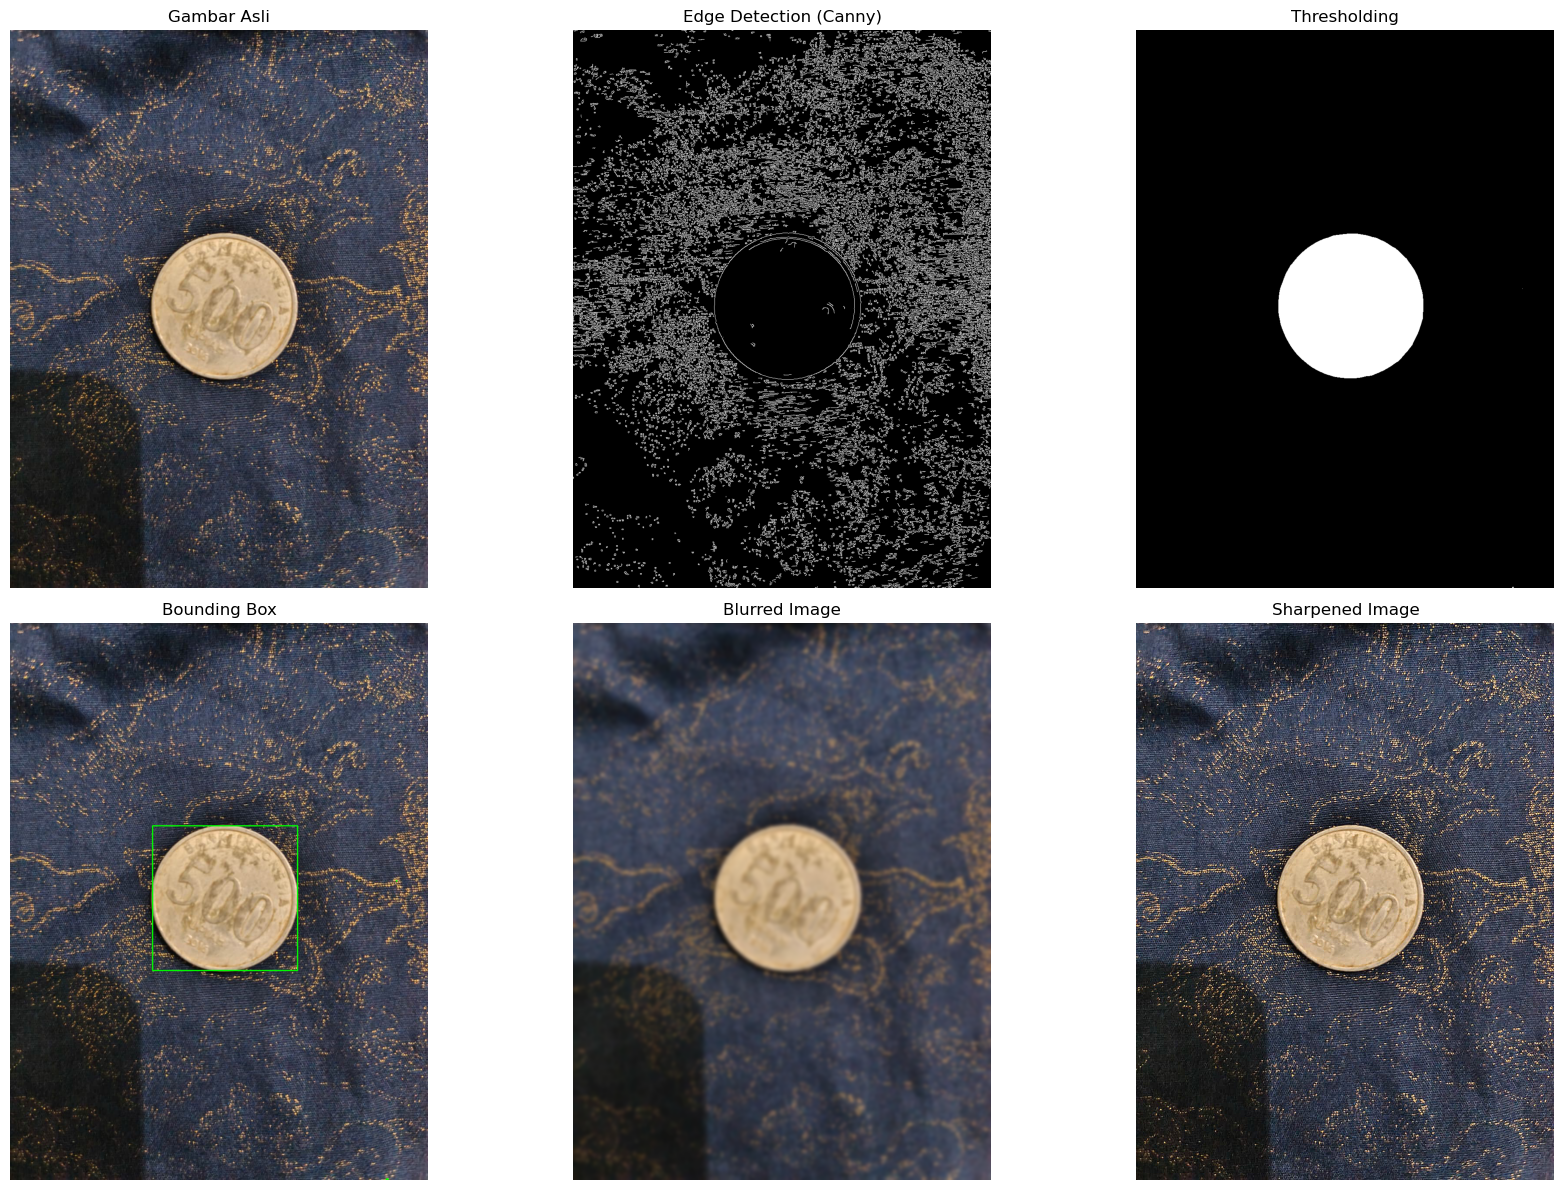

In [21]:
image_path = 'assets_ws4/gambar_objek_bertekstur.jpg'

# nilai ambang Canny (low, high)
canny_threshold_1 = 100
canny_threshold_2 = 200

# nilai ambang Thresholding (0-255)
threshold_value = 130

# ukuran kernel Blur (harus bilangan ganjil)
blur_kernel_size = (25, 25)

if not os.path.exists(image_path):
    raise FileNotFoundError(f"Gambar tidak ditemukan di path: {image_path}")

# Load gambar objek bertekstur
image = cv2.imread(image_path)

print(f"Gambar dimuat: {image_path}")

# Konversi ke grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Edge Detection menggunakan Canny
edges = cv2.Canny(gray_image, canny_threshold_1, canny_threshold_2)
print("Edge detection menggunakan Canny selesai.")

# Tambahkan blur sebelum thresholding untuk mengurangi noise
blurred_gray = cv2.GaussianBlur(gray_image, (25, 25), 0)
print("Proses blur pada grayscale selesai.")

# Thresholding pada gambar yang sudah di-blur
_, thresholded_image = cv2.threshold(blurred_gray, threshold_value, 255, cv2.THRESH_BINARY)
print("Proses thresholding selesai.")

# Buat Bounding Box (Otomatis)
contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
bounding_box_image = image.copy()

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(bounding_box_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

print("Proses membuat bounding box selesai.")

# Terapkan Filter Blur dan Sharpening
blurred_image = cv2.GaussianBlur(image, blur_kernel_size, 0)
sharpening_kernel = np.array([[0, -1, 0],
                                [-1, 5, -1],
                                [0, -1, 0]])
sharpened_image = cv2.filter2D(image, -1, sharpening_kernel)
print("Proses blur dan sharpening selesai.")

# Tampilkan Semua Hasil
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Gambar Asli')
axes[0, 0].axis('off')
axes[0, 1].imshow(edges, cmap='gray')
axes[0, 1].set_title('Edge Detection (Canny)')
axes[0, 1].axis('off')
axes[0, 2].imshow(thresholded_image, cmap='gray')
axes[0, 2].set_title('Thresholding')
axes[0, 2].axis('off')
axes[1, 0].imshow(cv2.cvtColor(bounding_box_image, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Bounding Box')
axes[1, 0].axis('off')
axes[1, 1].imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('Blurred Image')
axes[1, 1].axis('off')
axes[1, 2].imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
axes[1, 2].set_title('Sharpened Image')
axes[1, 2].axis('off')
plt.tight_layout()
plt.savefig('result_ws4/hasil_proses_gambar_bertekstur.png', dpi=150, bbox_inches='tight')
plt.show()

## Penjelasan Pengaruh Filter pada Detail Gambar

### 1. Edge Detection (Canny)
Mendeteksi tepi objek dengan mencari perubahan intensitas warna yang tajam. Hasilnya berupa garis-garis putih di background hitam yang menunjukkan kontur objek dan tekstur.

### 2. Thresholding
Mengubah gambar menjadi hitam-putih berdasarkan nilai ambang tertentu. Berguna untuk memisahkan objek dari background, tapi detail halus bisa hilang.

### 3. Bounding Box
Kotak hijau yang mengelilingi objek hasil segmentasi. Membantu mengidentifikasi posisi dan ukuran objek di dalam gambar.

### 4. Blur (Gaussian Blur)
Membuat gambar jadi lebih halus dan lembut dengan mengurangi noise dan detail tajam. Cocok untuk menghilangkan gangguan kecil atau membuat efek focus.

### 5. Sharpening
Kebalikan dari blur, mempertajam detail dan tepi objek. Gambar jadi lebih "crisp" tapi bisa memperkuat noise juga kalau berlebihan.

### **Soal 4 — Deteksi Wajah dan Filter Digital Kreatif**

* Ambil gambar diri Anda dengan ekspresi wajah **netral**.
* Lakukan **deteksi wajah dan landmark** menggunakan salah satu dari:

  * **MediaPipe**, atau
  * **Dlib**, atau
  * **OpenCV**.
* Buat **overlay filter digital kreatif** karya Anda sendiri, misalnya:

  * topi, kumis, masker, helm, aksesoris, atau bentuk unik lainnya.
  * Filter boleh dibuat dari **gambar eksternal (PNG)** *atau* digambar langsung (misal bentuk lingkaran, garis, poligon, dll).
* Pastikan posisi overlay menyesuaikan **landmark wajah** dengan logis.
* **Gunakan alpha blending sebagai saran** agar hasil tampak lebih natural.
* Tampilkan perbandingan antara **gambar asli** dan **hasil dengan filter**.
* Jelaskan bagaimana Anda menghitung posisi overlay dan tantangan yang dihadapi selama implementasi (gunakan **Markdown**).

Gambar dimuat, memulai deteksi wajah MediaPipe...
Wajah terdeteksi! Memproses landmark untuk filter...
Filter Monocle PNG digambar di: (207, 427) dengan ukuran: (150x150)
Filter Mustache PNG digambar di: (261, 600) dengan ukuran: (222x110)


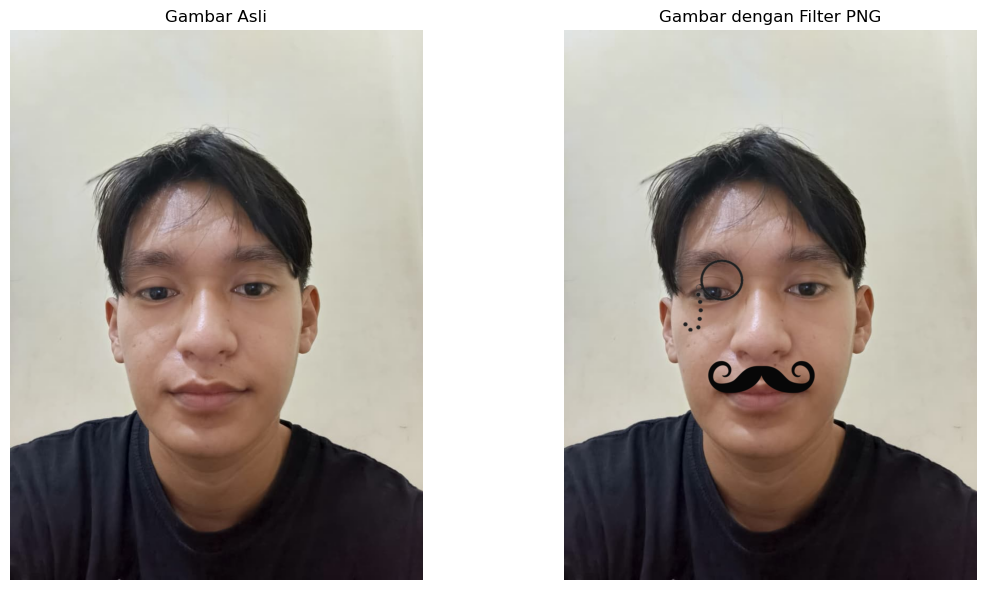

In [ ]:
image_path = 'assets_ws4/gambar_wajah_datar.jpg'
alpha = 0.8

monocle_png_path = 'assets_ws4/monocle.png'
mustache_png_path = 'assets_ws4/moustache.png' 

mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils

# Cek apakah file gambar input ada
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Gambar wajah tidak ditemukan di path: {image_path}")

# Cek apakah file filter PNG ada
if not os.path.exists(monocle_png_path):
    raise FileNotFoundError(f"Filter Monocle PNG tidak ditemukan di path: {monocle_png_path}")
if not os.path.exists(mustache_png_path):
    raise FileNotFoundError(f"Filter Mustache PNG tidak ditemukan di path: {mustache_png_path}")

def overlay_transparent_image(background_img, overlay_img_4_channels, x_offset, y_offset):
    # Pastikan overlay_img_4_channels memiliki 4 channel (BGR + Alpha)
    if overlay_img_4_channels.shape[2] != 4:
        raise ValueError("Overlay image must have 4 channels (BGR + Alpha).")

    bg_h, bg_w, _ = background_img.shape
    fg_h, fg_w, _ = overlay_img_4_channels.shape

    # Pastikan offset tidak negatif
    x_offset = max(0, x_offset)
    y_offset = max(0, y_offset)

    # Hitung area yang akan di-overlay di background
    x1 = x_offset
    y1 = y_offset
    x2 = x_offset + fg_w
    y2 = y_offset + fg_h

    # Klip koordinat agar tidak melebihi batas gambar background
    x1_clipped = max(0, x1)
    y1_clipped = max(0, y1)
    x2_clipped = min(bg_w, x2)
    y2_clipped = min(bg_h, y2)

    # Hitung area overlay di gambar overlay
    # Ini penting jika overlay dipotong di pinggir gambar background
    fg_x1 = x1_clipped - x1
    fg_y1 = y1_clipped - y1
    fg_x2 = fg_w - (x2 - x2_clipped)
    fg_y2 = fg_h - (y2 - y2_clipped)

    # Jika tidak ada area yang tumpang tindih, keluar
    if fg_x1 >= fg_x2 or fg_y1 >= fg_y2:
        return background_img

    # Ambil ROI dari background yang akan ditimpa
    roi = background_img[y1_clipped:y2_clipped, x1_clipped:x2_clipped]

    # Ambil overlay yang sesuai dengan ROI
    overlay_clipped = overlay_img_4_channels[fg_y1:fg_y2, fg_x1:fg_x2]

    # Pisahkan channel RGB dan Alpha dari overlay
    fg_rgb = overlay_clipped[:, :, 0:3]
    alpha_channel = overlay_clipped[:, :, 3] / 255.0  # Normalisasi Alpha ke 0-1

    # Invert mask untuk background
    alpha_background = 1.0 - alpha_channel

    # Lakukan blending
    for c in range(0, 3):
        roi[:, :, c] = (alpha_background * roi[:, :, c] +
                        alpha_channel * fg_rgb[:, :, c])

    return background_img


# Muat gambar wajah
img_bgr = cv2.imread(image_path)
if img_bgr is None:
    raise ValueError(f"Gagal membaca gambar '{image_path}'.")


img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
h, w, c = img_rgb.shape

monocle_img_raw = cv2.imread(monocle_png_path, cv2.IMREAD_UNCHANGED)
mustache_img_raw = cv2.imread(mustache_png_path, cv2.IMREAD_UNCHANGED)

if monocle_img_raw is None or mustache_img_raw is None:
    raise ValueError("Gagal membaca salah satu file filter PNG. Pastikan path dan format benar.")
if monocle_img_raw.shape[2] != 4 or mustache_img_raw.shape[2] != 4:
    raise ValueError("File filter PNG harus memiliki 4 channel (BGR + Alpha).")

img_filtered = img_bgr.copy()

print("Gambar dimuat, memulai deteksi wajah MediaPipe...")


# Proses gambar dengan MediaPipe
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    min_detection_confidence=0.5) as face_mesh:

    results = face_mesh.process(img_rgb.astype(np.uint8))

if not results.multi_face_landmarks:
    print("Error: Tidak ada wajah yang terdeteksi di gambar.", file=sys.stderr)
    sys.exit(1)

print("Wajah terdeteksi! Memproses landmark untuk filter...")

face_landmarks = results.multi_face_landmarks[0].landmark


def get_coords(landmark_id):
    lm = face_landmarks[landmark_id]
    return int(lm.x * w), int(lm.y * h)

try:
    
    left_eye_left = get_coords(33)
    left_eye_right = get_coords(133)
    left_eye_top = get_coords(159)
    left_eye_bottom = get_coords(23) 

    monocle_center_x = (left_eye_left[0] + left_eye_right[0]) // 2
    monocle_center_y = (left_eye_top[1] + left_eye_bottom[1]) // 2
    
    eye_width = abs(left_eye_right[0] - left_eye_left[0])
    
    target_monocle_width = int(eye_width * 2)
    target_monocle_height = target_monocle_width 

    # Resize gambar monocle PNG
    monocle_resized = cv2.resize(monocle_img_raw, (target_monocle_width, target_monocle_height), interpolation=cv2.INTER_AREA)

    monocle_x_offset = monocle_center_x - target_monocle_width // 2
    monocle_y_offset = monocle_center_y - target_monocle_height // 2

    # Terapkan overlay monocle
    img_filtered = overlay_transparent_image(img_filtered, monocle_resized, monocle_x_offset, monocle_y_offset)
    print(f"Filter Monocle PNG digambar di: ({monocle_x_offset}, {monocle_y_offset}) dengan ukuran: ({target_monocle_width}x{target_monocle_height})")

    # --- Filter Mustache ---
    nose_bottom = get_coords(2)
    lip_top = get_coords(13)
    mouth_left = get_coords(61)
    mouth_right = get_coords(291)

    mustache_center_x = (mouth_left[0] + mouth_right[0]) // 2
    mustache_center_y = (lip_top[1] + nose_bottom[1]) // 2
    
    # Hitung lebar mulut untuk menentukan ukuran kumis
    mouth_width = abs(mouth_right[0] - mouth_left[0])
    
    # Ukuran target kumis (misal 1.5x lebar mulut)
    target_mustache_width = int(mouth_width * 1.5)
    
    # Pastikan proporsi kumis tetap sama dengan gambar PNG aslinya
    mustache_aspect_ratio = mustache_img_raw.shape[1] / mustache_img_raw.shape[0] # Lebar / Tinggi
    target_mustache_height = int(target_mustache_width / mustache_aspect_ratio)

    # Resize gambar kumis PNG
    mustache_resized = cv2.resize(mustache_img_raw, (target_mustache_width, target_mustache_height), interpolation=cv2.INTER_AREA)

    # Hitung posisi top-left untuk menempelkan kumis
    mustache_x_offset = mustache_center_x - target_mustache_width // 2
    mustache_y_offset = mustache_center_y - target_mustache_height // 2

    # Terapkan overlay kumis
    img_filtered = overlay_transparent_image(img_filtered, mustache_resized, mustache_x_offset, mustache_y_offset)
    print(f"Filter Mustache PNG digambar di: ({mustache_x_offset}, {mustache_y_offset}) dengan ukuran: ({target_mustache_width}x{target_mustache_height})")

    # --- Tampilkan Perbandingan ---
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("Gambar Asli")
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.title("Gambar dengan Filter PNG")
    plt.imshow(cv2.cvtColor(img_filtered, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('result_ws4/perbandingan_gambar_dengan_filter_png.png', dpi=150, bbox_inches='tight')
    plt.show()

except Exception as e:
    print(f"Terjadi error saat menghitung landmark atau overlay: {e}", file=sys.stderr)
    print("Pastikan wajah Anda terlihat jelas di foto, PNG filter memiliki 4 channel (termasuk alpha), dan coba sesuaikan alpha blending.")


## Penjelasan Posisi Overlay dan Tantangan Implementasi

### Cara Menghitung Posisi Overlay

**Monocle (Kacamata Bulat)**
- Pakai landmark mata kiri MediaPipe (titik 33, 133, 159, 23)
- Hitung titik tengah mata dari koordinat kiri-kanan dan atas-bawah
- Ukuran monocle dibuat 2x lebar mata biar pas
- Posisi overlay: titik tengah dikurangi setengah ukuran monocle

**Mustache (Kumis)**
- Pakai landmark hidung bawah (titik 2), bibir atas (titik 13), dan sudut mulut (titik 61, 291)
- Titik tengah kumis ada di antara hidung dan bibir
- Ukuran kumis 1.5x lebar mulut
- Tinggi kumis disesuaikan dengan aspect ratio gambar PNG asli

### Tantangan yang Dihadapi

1. **Nyari Landmark yang Pas**  
    Awalnya bingung titik mana yang tepat buat mata dan kumis. Solusinya trial-error beberapa kombinasi titik landmark sampai ketemu yang natural.

2. **Ukuran Filter**  
    Kalau terlalu besar atau kecil jadi aneh. Akhirnya pakai perkalian dari lebar mata/mulut biar dinamis mengikuti ukuran wajah.

3. **Alpha Blending**  
    Gambar PNG harus punya channel alpha yang bener. Fungsi `overlay_transparent_image()` bikin filter nyatu sama background tanpa kotak putih.

4. **Posisi Offset**  
    Kadang filter kegeser kalau posisi wajah di foto miring atau terlalu ke pinggir. Solusinya pastikan wajah di foto cukup centered dan frontal.

### **Soal 5 — Perspektif dan Peningkatan Kualitas Citra**

* Ambil gambar **objek datar** seperti karya tangan di kertas, tulisan di papan tulis, atau foto produk di meja dengan kondisi pencahayaan atau sudut yang tidak ideal.
* Lakukan **preprocessing** untuk memperbaiki tampilan agar lebih rapi dan jelas, dengan langkah-langkah:

  * Konversi ke **grayscale**.
  * **Koreksi perspektif (transformasi homografi)** menggunakan **4 titik manual** agar objek terlihat sejajar dan tidak terdistorsi.
  * Terapkan **thresholding adaptif atau Otsu** (pilih salah satu, dan jelaskan alasan pilihan Anda).
* Tampilkan **setiap tahap pemrosesan dalam satu grid** agar mudah dibandingkan.
* Jelaskan fungsi masing-masing tahap dan bagaimana teknik ini meningkatkan kualitas visual citra (gunakan **Markdown**).

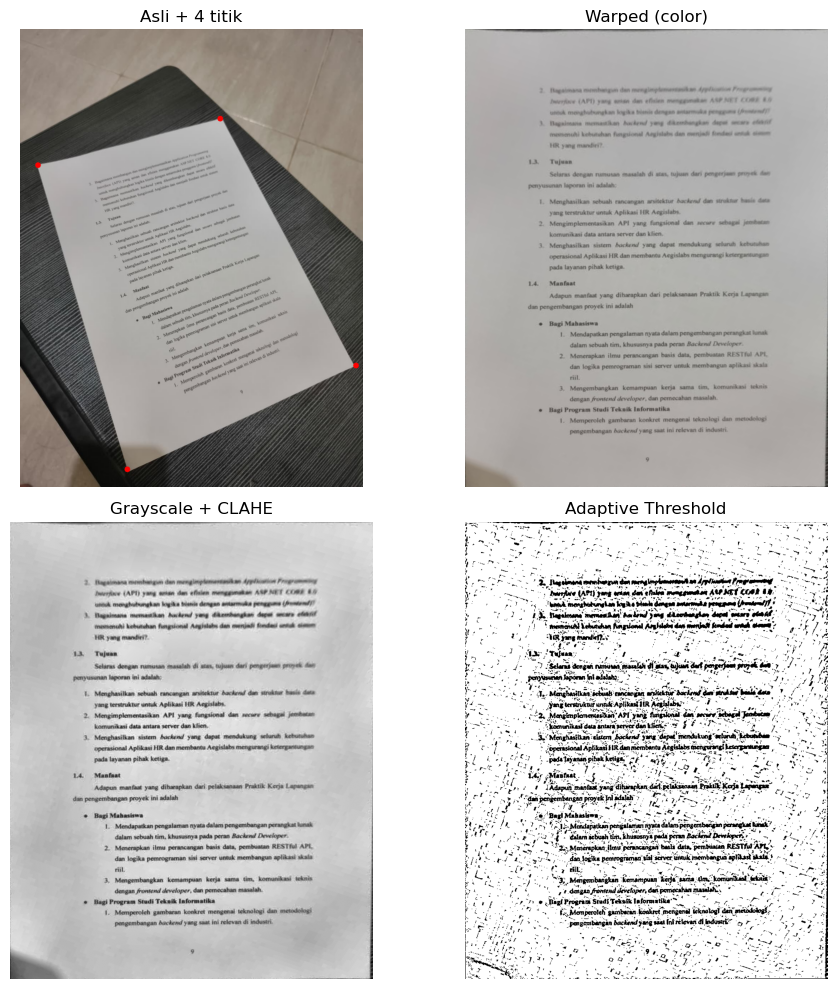

In [14]:
image_path = 'assets_ws4/dokumen.jpg'

pts_src = np.array([
    [50, 380],  
    [560, 250],  
    [300, 1230],  
    [940, 940] 
], dtype="float32")


def order_points(pts):
    pts = np.array(pts, dtype="float32")
    s = pts.sum(axis=1)
    diff = np.diff(pts, axis=1).ravel()
    tl = pts[np.argmin(s)]
    br = pts[np.argmax(s)]
    tr = pts[np.argmin(diff)]
    bl = pts[np.argmax(diff)]
    return np.array([tl, tr, br, bl], dtype="float32")


if not os.path.exists(image_path):
    raise FileNotFoundError(image_path)

img_bgr = cv2.imread(image_path)
if img_bgr is None:
    raise RuntimeError("cv2.imread gagal — cek path/format file")


pts = order_points(pts_src)
(tl, tr, br, bl) = pts


widthA = hypot(br[0] - bl[0], br[1] - bl[1])  
widthB = hypot(tr[0] - tl[0], tr[1] - tl[1]) 
maxWidth = int(max(widthA, widthB))

heightA = hypot(tr[0] - br[0], tr[1] - br[1]) 
heightB = hypot(tl[0] - bl[0], tl[1] - bl[1])  
maxHeight = int(max(heightA, heightB))


maxWidth = max(100, maxWidth)
maxHeight = max(100, maxHeight)

pts_dst = np.array([
    [0, 0],
    [maxWidth - 1, 0],
    [maxWidth - 1, maxHeight - 1],
    [0, maxHeight - 1]
], dtype="float32")


M = cv2.getPerspectiveTransform(pts, pts_dst)
warped_color = cv2.warpPerspective(img_bgr, M, (maxWidth, maxHeight))


warped_gray = cv2.cvtColor(warped_color, cv2.COLOR_BGR2GRAY)


clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
warped_clahe = clahe.apply(warped_gray)


block_size = 15 if 15 % 2 == 1 else 15+1
C_constant = 2
th = cv2.adaptiveThreshold(
    warped_clahe,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,   
    block_size,
    C_constant
)


plt.figure(figsize=(10,10))
plt.subplot(2,2,1); 

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB).copy()
for p in pts.astype(int):
    cv2.circle(img_rgb, tuple(p), 8, (255,0,0), -1)
plt.imshow(img_rgb); plt.title("Asli + 4 titik"); plt.axis('off')

plt.subplot(2,2,2); plt.imshow(cv2.cvtColor(warped_color, cv2.COLOR_BGR2RGB)); plt.title("Warped (color)"); plt.axis('off')
plt.subplot(2,2,3); plt.imshow(warped_clahe, cmap='gray'); plt.title("Grayscale + CLAHE"); plt.axis('off')
plt.subplot(2,2,4); plt.imshow(th, cmap='gray'); plt.title("Adaptive Threshold"); plt.axis('off')

plt.tight_layout()
plt.show()

## Penjelasan Tahap Pemrosesan dan Peningkatan Kualitas Citra

### 1. Konversi ke Grayscale
Mengubah gambar berwarna jadi hitam-putih. Bikin proses selanjutnya lebih simple karena cuma fokus ke intensitas cahaya, bukan warna.

### 2. Koreksi Perspektif (Transformasi Homografi)
Pakai 4 titik manual untuk "lurusin" objek yang miring atau terdistorsi. Hasilnya objek jadi tampak sejajar dan lebih rapi, kayak dipindai dari atas.

**Cara kerjanya:**
- Pilih 4 titik sudut di gambar asli yang miring
- Mapping ke 4 titik baru yang membentuk persegi panjang sempurna
- OpenCV hitung matrix transformasi dan warp gambar

### 3. CLAHE (Contrast Limited Adaptive Histogram Equalization)
Ningkatin kontras gambar secara lokal supaya detail yang gelap atau terlalu terang jadi lebih keliatan. Cocok buat gambar dengan pencahayaan gak rata.

### 4. Adaptive Thresholding
Ngubah gambar jadi hitam-putih murni berdasarkan nilai lokal tiap area. Lebih bagus dari thresholding biasa karena bisa adaptif sama kondisi pencahayaan yang beda-beda di gambar.

**Kenapa pakai Adaptive Threshold?**
- Lebih robust untuk gambar dengan shadow atau pencahayaan gak merata
- Otsu bagus kalau pencahayaan gambar rata, tapi disini kondisinya gak ideal

### Kesimpulan
Kombinasi teknik ini bikin dokumen atau objek datar yang difoto asal-asalan jadi lebih jelas, rapi, dan gampang dibaca. Perfect buat scan dokumen manual pakai HP!

### **Aturan Umum Pengerjaan**

* Kerjakan secara **mandiri**.
* Bantuan AI (seperti ChatGPT, Copilot, dsb.) diperbolehkan **dengan bukti percakapan** (screenshot / link / script percakapan).
* Source code antar mahasiswa harus berbeda.
* Jika mendapat bantuan teman, tuliskan nama dan NIM teman yang membantu.
* Plagiarisme akan dikenakan sanksi sesuai aturan akademik ITERA.
* Cantumkan seluruh **credit dan referensi** yang digunakan di bagian akhir notebook.
* Penjelasan setiap soal ditulis dalam **Markdown**, bukan di dalam komentar kode.

---

### **Aturan Pengumpulan**

* Semua file kerja Anda (notebook `.ipynb`, gambar, dan hasil) **wajib diunggah ke GitHub repository tugas sebelumnya**.

  * Gunakan struktur folder berikut di dalam repo Anda:

    ```
    /Nama_NIM_Repo/ # Nama repo sebelumnya
      ├── assets_ws4/     # berisi semua gambar atau video asli (input)
      ├── results_ws4/    # berisi semua hasil modifikasi dan output
      ├── worksheet4.ipynb
      └── NIM_Worksheet4.pdf
    ```
* File yang dikumpulkan ke **Tally** hanya berupa **hasil PDF** dari notebook Anda, dengan format nama:

  ```
  NIM_Worksheet4.pdf
  ```
* Pastikan notebook telah dijalankan penuh sebelum diekspor ke PDF.
* Sertakan tautan ke repository GitHub Anda di bagian atas notebook atau di halaman pertama PDF.

---

### ✅ **Catatan Akhir**

> Worksheet 4 ini bertujuan mengasah pemahaman Anda tentang manipulasi citra digital secara praktis. Gunakan kreativitas Anda untuk menghasilkan hasil visual yang menarik dan penjelasan konseptual yang jelas.

# Referensi

- [GeminiAI](https://gemini.google.com/share/32dca57a9651)